In [1]:
import sys
sys.path.append('../../')
from utils.google_trends import GoogleTrends
from utils import misc
import pandas as pd
import re
import string
from collections import defaultdict

## Individual Movies vs Search Trends


In [2]:
box_office_df = pd.read_csv("../../../conf/movies/box_office.csv").set_index('Date')
box_office_df.set_index(pd.to_datetime(box_office_df.index), inplace=True)
gt = GoogleTrends()

2019-12-05 17:38:22,541 | [google_trends.py __init__:33] | [INFO] - Successfully connected session to Google Trends


2019-12-05 17:38:23,379 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Avengers Endgame'], start_date - 2019-04-26, end_date - 2019-05-26, category - None and geo - US
2019-12-05 17:38:24,150 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (31, 1)
2019-12-05 17:38:24,154 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Avengers Endgame
date                        
2019-04-26                97
2019-04-27               100
2019-04-28                91
2019-04-29                58
2019-04-30                35


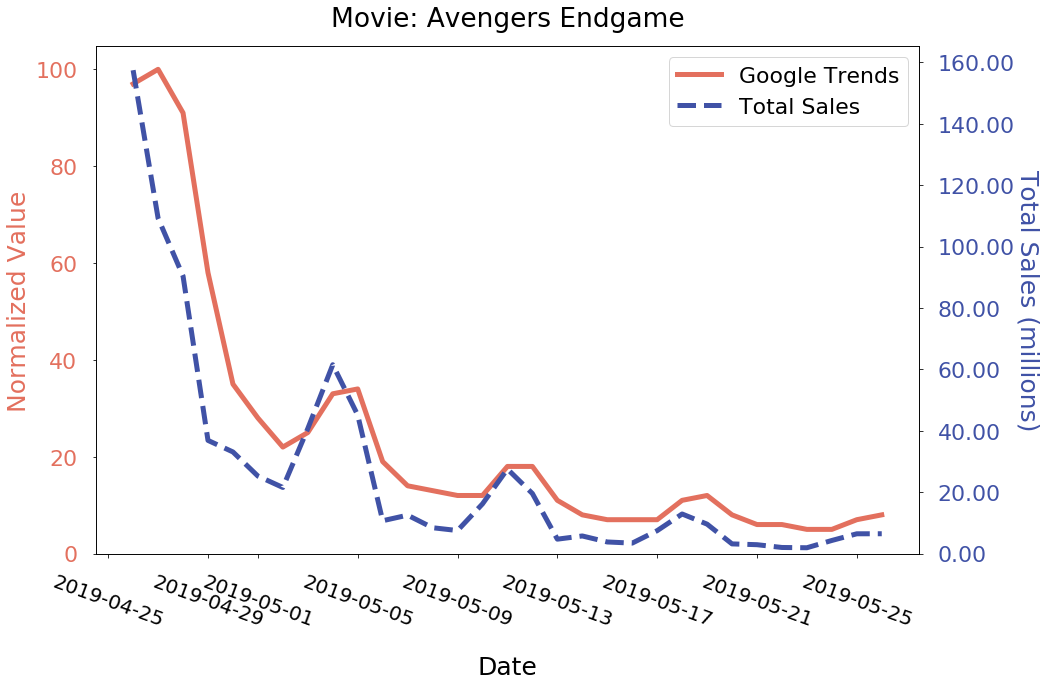

In [3]:
keywords = ['Avengers Endgame']
start_date = '2019-04-26'
end_date = '2019-05-26'
avengers_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
avengers_sales = box_office_df['avengers'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(df1=avengers_trends, df2=avengers_sales, save_fig=False)

2019-12-05 17:38:25,213 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Black Panther'], start_date - 2018-02-16, end_date - 2018-03-16, category - None and geo - US
2019-12-05 17:38:25,820 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (29, 1)
2019-12-05 17:38:25,836 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Black Panther
date                     
2018-02-16             68
2018-02-17             93
2018-02-18            100
2018-02-19             80
2018-02-20             52


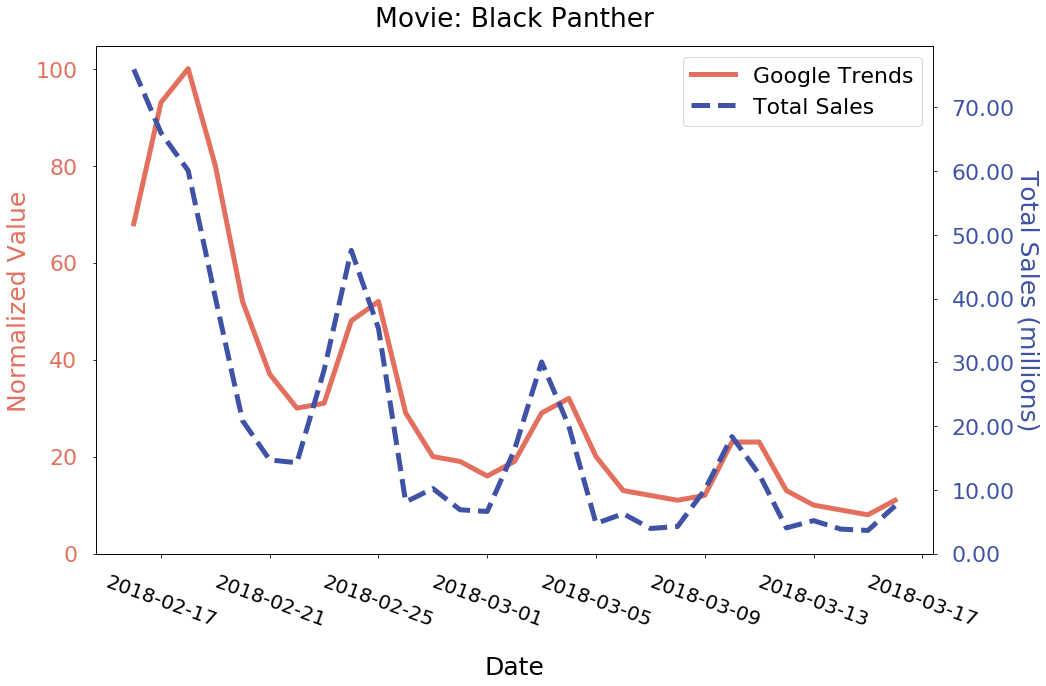

In [4]:
keywords = ['Black Panther']
start_date = '2018-02-16'
end_date = '2018-03-16'
blackpanther_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
blackpanther_sales = box_office_df['blackpanther'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(blackpanther_trends, blackpanther_sales, False, "Black Panther Time Series")

2019-12-05 17:38:26,683 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Star Wars'], start_date - 2017-12-15, end_date - 2018-01-15, category - None and geo - US
2019-12-05 17:38:27,355 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (32, 1)
2019-12-05 17:38:27,359 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Star Wars
date                 
2017-12-15         89
2017-12-16        100
2017-12-17         95
2017-12-18         64
2017-12-19         48


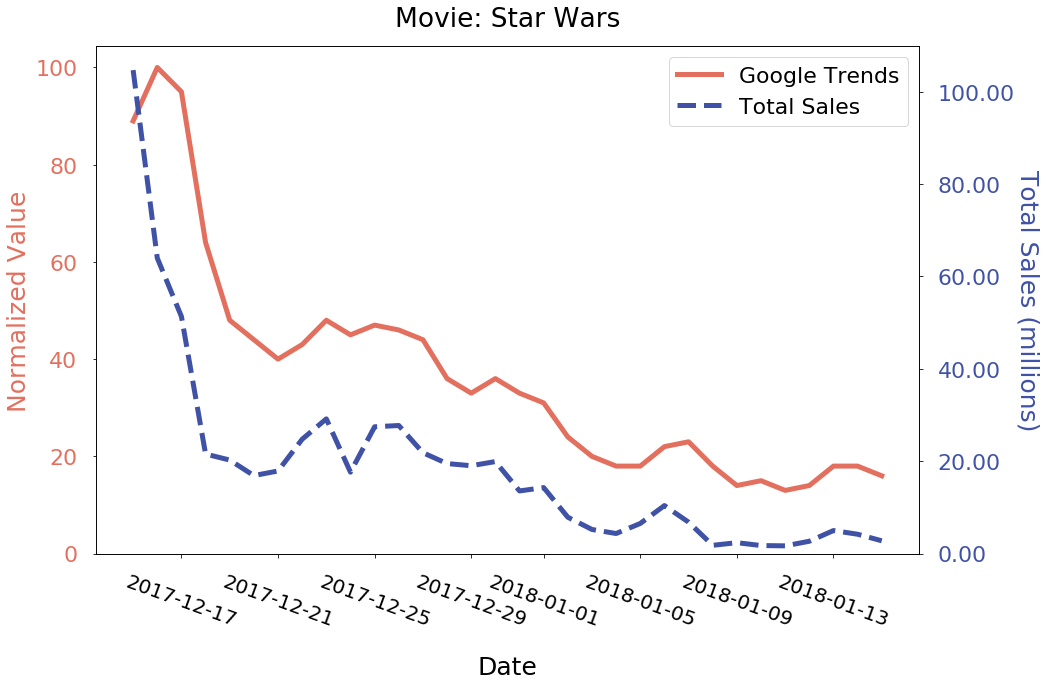

In [5]:
keywords = ['Star Wars']
start_date = '2017-12-15'
end_date = '2018-01-15'
starwars_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
starwars_sales = box_office_df['starwars'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(starwars_trends, starwars_sales, False, "Star Wars Time Series")

2019-12-05 17:38:28,166 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Jurassic World'], start_date - 2015-06-12, end_date - 2015-07-12, category - None and geo - US
2019-12-05 17:38:29,174 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (31, 1)
2019-12-05 17:38:29,174 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Jurassic World
date                      
2015-06-12              72
2015-06-13             100
2015-06-14             100
2015-06-15              62
2015-06-16              42


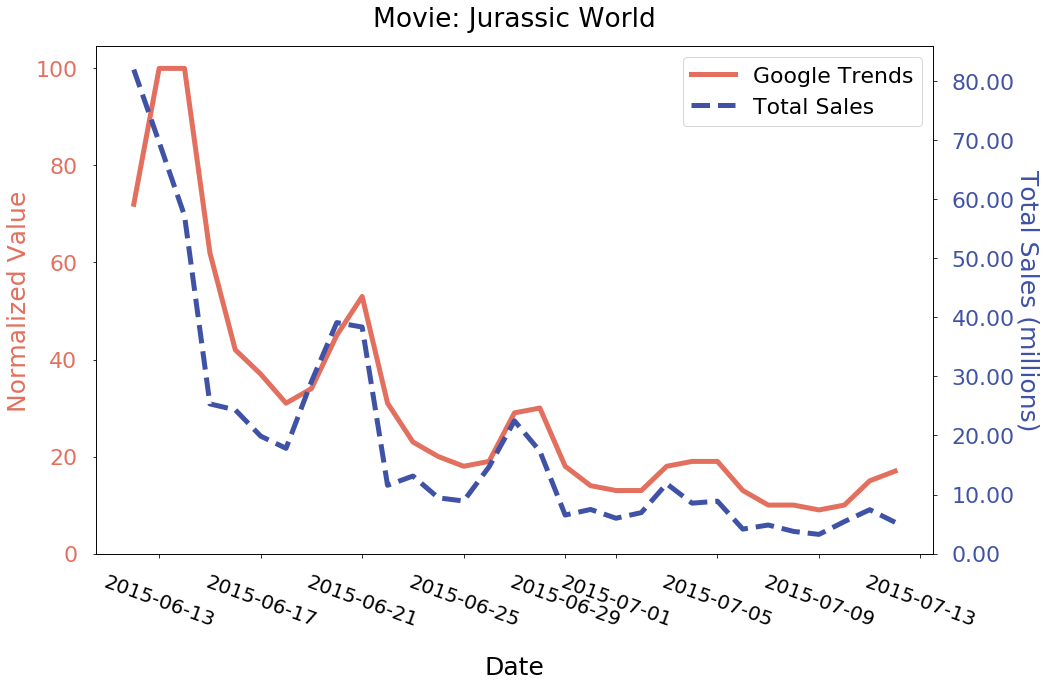

In [6]:
keywords = ['Jurassic World']
start_date = '2015-06-12'
end_date = '2015-07-12'
jurassicworld_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
jurassicworld_sales = box_office_df['jurassicworld'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(jurassicworld_trends, jurassicworld_sales, False, "Jurassic World Time Series")

## Top Movies by Year

In [7]:
year_sales_df = pd.read_csv("../../../conf/movies/year_sales.csv").set_index('keywords')

2019-12-05 17:38:31,633 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Avengers'], start_date - 2019-01-01, end_date - 2019-12-31, category - None and geo - US
2019-12-05 17:38:32,465 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (48, 5)
2019-12-05 17:38:32,469 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Toy Story  Lion King  Captain Marvel  Spider man  Avengers
date                                                                  
2019-01-06          3          3               5           6         8
2019-01-13          2          3               3          12         7
2019-01-20          2          3               2           5         6
2019-01-27          3          2               2           4         6
2019-02-03          4          2               4           4         

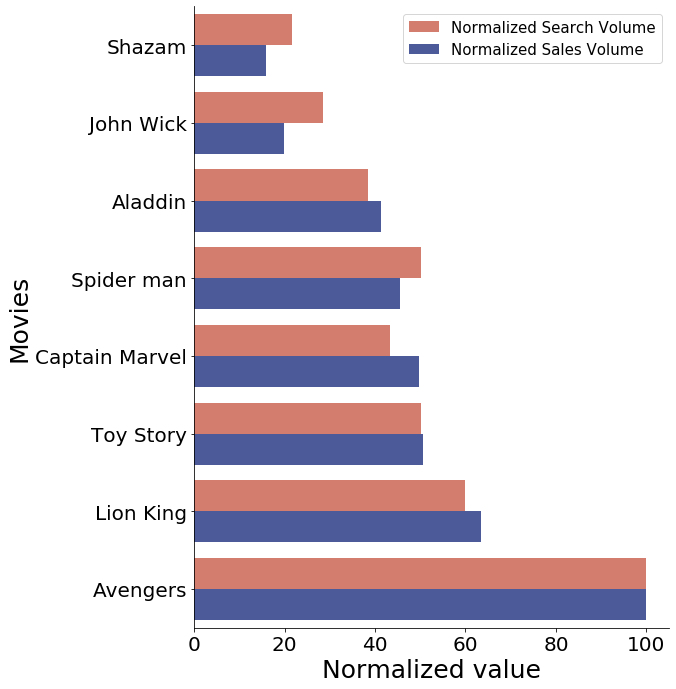

In [8]:
#2019
keywords = ['Avengers', 'Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Aladdin', 'John Wick', 'Shazam']
start_date = '2019-01-01'
end_date = '2019-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
 
sales_2019_df = year_sales_df['2019'].dropna().to_frame().rename(columns={'2019': 'Normalized Sales Volume'})
 
df = sales_2019_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=True, plot_name='movies_2019')

2019-12-05 17:38:37,969 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Avengers', 'Incredibles', 'Jurassic World', 'Deadpool 2', 'Black Panther'], start_date - 2018-01-01, end_date - 2018-12-31, category - None and geo - US
2019-12-05 17:38:38,820 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (52, 5)
2019-12-05 17:38:38,820 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Avengers  Incredibles  Jurassic World  Deadpool 2  Black Panther
date                                                                        
2018-01-07         3            1               1           1              8
2018-01-14         3            1               1           1              6
2018-01-21         3            2               1           0              6
2018-01-28         3            1               1           0             15
2018-02-04         4       

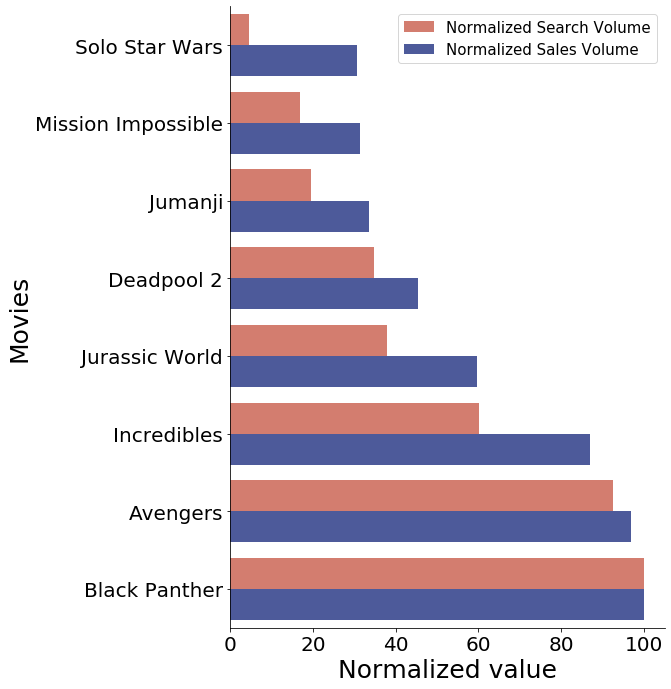

In [9]:
#2018
keywords = ['Black Panther', 'Avengers', 'Incredibles', 'Jurassic World', 'Deadpool 2', 'Jumanji', 'Mission Impossible', 'Solo Star Wars']
start_date = '2018-01-01'
end_date = '2018-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)

sales_2018_df = year_sales_df['2018'].dropna().to_frame().rename(columns={'2018': 'Normalized Sales Volume'})

df = sales_2018_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=True, plot_name='movies_2018')

## Top Action Movies

C:\Users\Tushar\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\Tushar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
2019-12-05 17:38:41,251 | [google_trends.py get_trends_data:65] | [INFO] - Sending data to Google Trends with keywords - ['Deadpool', 'Suicide Squad', 'Doctor Strange', 'Jason Bourne', 'Star Wars'], start_date - 2016-01-01, end_date - 2016-12-31, category - None and geo - US
2019-12-05 17:38:42,086 | [google_trends.py get_trends_data:72] | [INFO] - Received dataframe from Google Trends of size - (52, 5)
2019-12-05 17:38:42,090 | [google_trends.py get_trends_data:73] | [INFO] - Sample rows from dataframe: 
            Deadpool  Suicide Squad  Doctor Strange  Jason Bourne  Star Wars


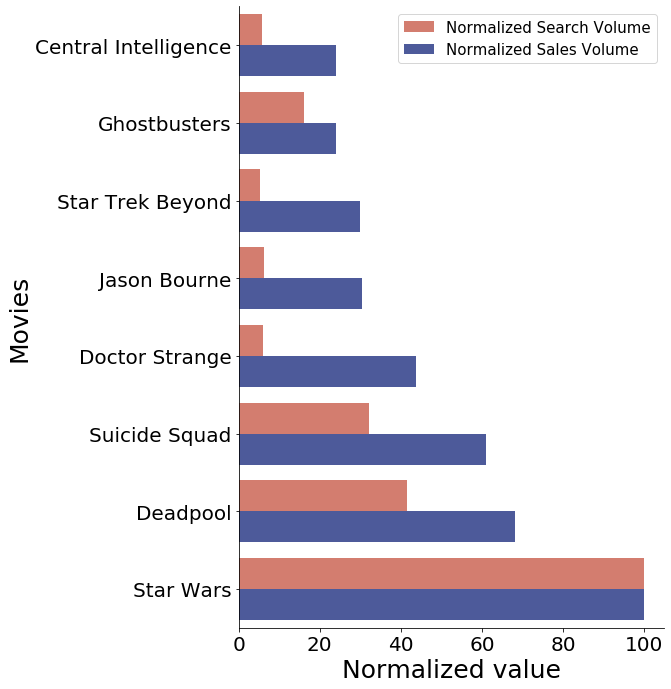

In [10]:
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])

imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Year'] == 2016]

imdb_action = imdb[imdb['Genre'] == 'Action'][:8]
imdb_action = imdb_action[['Title', 'Revenue (Millions)']]
imdb_action_df = imdb_action.rename(columns={"Revenue (Millions)":"Normalized Sales Volume", "Title": "Movies"})
imdb_action_df.set_value(12, 'Movies', 'Star Wars')
idx = range(len(imdb_action))
movies_action = list(imdb_action_df.iloc[idx]['Movies'])
imdb_action_df.set_index(keys='Movies', inplace=True)
  
start_date = '2016-01-01'
end_date = '2016-12-31'
search_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(movies_action, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
  
df = imdb_action_df.apply(lambda x : x*100/x.max()).merge(search_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=True, plot_name='action_corrected')

## Movie Ratings vs Trends

In [17]:
# Data Preparation
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])
imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Title'].str.split().str.len() <= 4]

df_popularity_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Votes'], ascending=[False])[:40]
    imdb_score_grp_popularity = imdb_score.groupby(['Score']).count()['Votes'].to_frame()
    df_popularity_list.append(imdb_score_grp_popularity)

df_revenue_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Revenue'], ascending=[False])[:40]
    imdb_score_grp_revenue = imdb_score.groupby(['Score']).count()['Revenue'].to_frame()
    df_revenue_list.append(imdb_score_grp_revenue) 

C:\Users\Tushar\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [18]:
revenue_dict = defaultdict(list)
for i in range(len(df_revenue_list)):
    revenue_dict['0-4'].append(list(df_revenue_list[i]['Revenue'])[0])
    revenue_dict['4-6'].append(list(df_revenue_list[i]['Revenue'])[1])
    revenue_dict['6-8'].append(list(df_revenue_list[i]['Revenue'])[2])
    revenue_dict['8-10'].append(list(df_revenue_list[i]['Revenue'])[3])

popularity_dict = defaultdict(list)
for i in range(len(df_popularity_list)):
    popularity_dict['0-4'].append(list(df_popularity_list[i]['Votes'])[0])
    popularity_dict['4-6'].append(list(df_popularity_list[i]['Votes'])[1])
    popularity_dict['6-8'].append(list(df_popularity_list[i]['Votes'])[2])
    popularity_dict['8-10'].append(list(df_popularity_list[i]['Votes'])[3])  

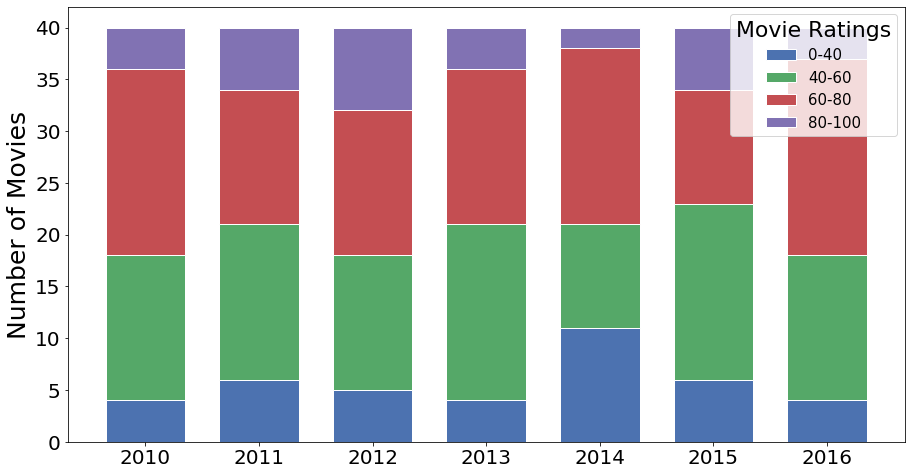

In [19]:
# By Revenue
misc.stacked_bar_plot(revenue_dict, False)   

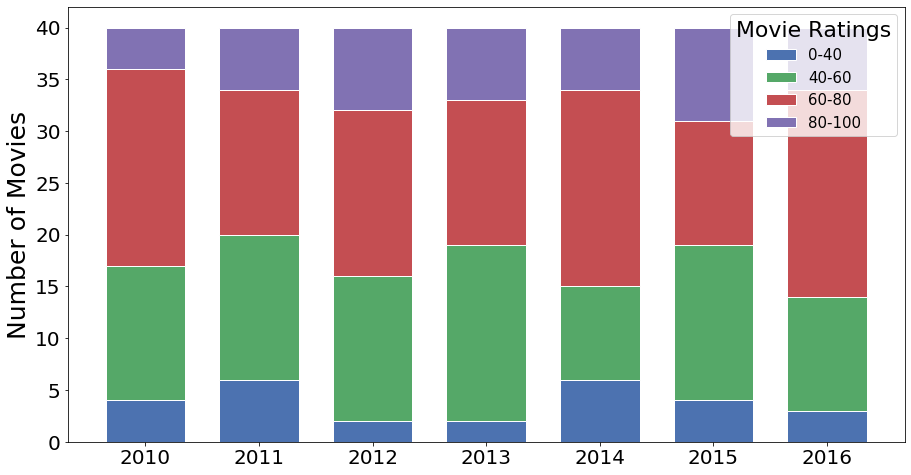

In [20]:
# By Popularity
misc.stacked_bar_plot(popularity_dict, False)